# Data manipulation
***

0. [Loading the data](#load)
1. [Introduction](#intro)
1. [Turning defects into a dichotomous variable](#dich)
1. [Splitting the data](#split)

 ### 0. Loading the data<a id='load'>

To load our data, we just run the <a href='loading_data.ipynb'>script we created for the purpose</a>

In [1]:
%%capture 
%run 1_loading_data.ipynb

### 1. Introduction

A very important step in data analysis is data manipulation. Manipulation is the process of changing the data, in order to make it more readable and usable. In our <a href='eda.ipynb'>explorative data analysis</a>, we've seen that our datasets are strongly imbalanced on the 0. In this section, we will turn `defects` into a **dichotomous variable**, admitting just two values: <ul><li><b>0</b> for classes without defects</li><li><b>1</b> for classes that present one or more defects</li></ul>

### 2. Turning defects into a dichotomous variable<a id='dich'>

Let's start by defining a function that, taken a DataFrame as input, returns the same DataFrame in which the values of `defects > 1` has been turned into `1`

In [2]:
def transform_defects(dataFrame):
    to_change = dataFrame[dataFrame['defects']>=2].index
    for index in to_change:
        dataFrame['defects'][index] = 1.0
    return dataFrame

Now we can transform our datasets:

In [3]:
for key in names:
    datasets[key] = transform_defects(datasets[key])

Let's explore the transformed datasets:

In [4]:
def plot_zero_one(datasets, names, fileName):
    bars = len(names)
    plt.figure(figsize=(15,7))
    x_pos = np.arange(bars)
    heigths = [[],[]]

    for key in names:
        for i in (0,1):
            heigths[i].append(datasets[key]['defects'].value_counts()[i])

    plt.bar(x_pos - 0.2, heigths[0], 0.4, label = '0', color='#55CC55', edgecolor='black')
    plt.bar(x_pos + 0.2, heigths[1], 0.4, label = '1', color='#AA3333', edgecolor='black')

    plt.xticks(x_pos, names)
    plt.xlabel("Dataset")
    plt.ylabel("Classes")
    plt.title("Defected classes")
    plt.legend()
    savefig(fileName)
    plt.show()

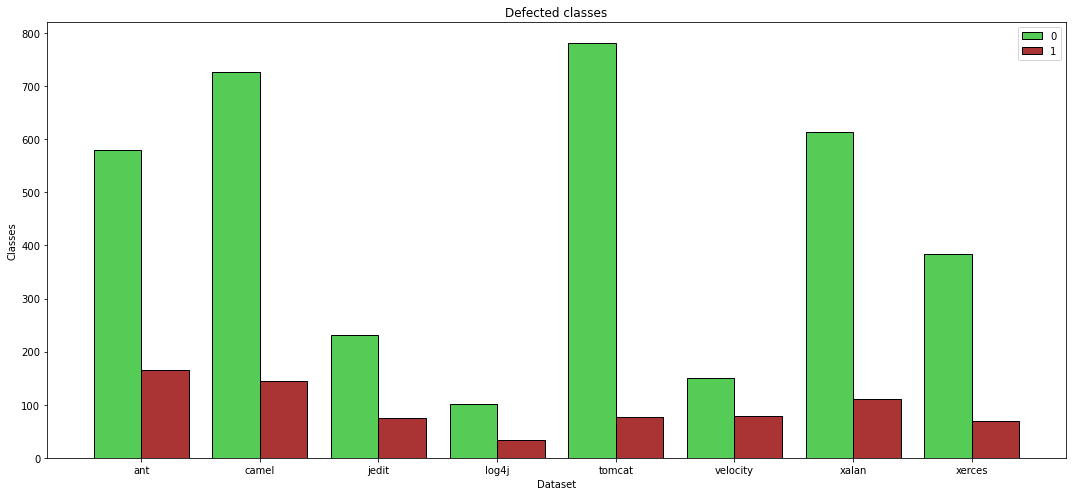

In [5]:
plot_zero_one(datasets, names, 'defect_distribution_in_transformed_data')

As we can see, now `defects` assumes only 0 (standing for `False`)  and 1 (standing for `True`). This makes the prediction of presence of defective classes more reliable than before

### 3. Splitting the data<a href='split'>

Our need, now, is to **split** each dataset into 2 parts: one for *training* and one for *testing*.

The *training* set will be used by our models to learn the way to make the prediction, while the *testing* set will be used to evaluate the models' performances.
An appropriate ratio could be `80%-20%`.

Let's define a function that will help us to split datasets faster:

In [6]:
from sklearn.model_selection import train_test_split
def split(dataFrame):
    y = dataFrame.defects
    x = dataFrame.drop('defects', axis=1)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=45)
    return x_train, x_test, y_train, y_test

First of all, our function will remove the variable to predict (in our case, `defects`) from the dataset, and assign it to a new set `Y`, while `X` will now be the **original dataset without `defects`**. Then, it will split `X` and `Y` into 2 parts, one for training and one for testing. As a result, it will create 4 new variables per each dataset:
<ul>
    <li>X train</li>
    <li>X test</li>
    <li>Y train</li>
    <li>Y test</li>
</ul>

We decide to store our splitted sets into 4 new dictionaries, structured as

`dataset: splitted set`

As before, the main reason we use this method is practical: later, we will need to repeat the same operations for every dataset, and, this way, we will be able to use loops.

In [7]:
X_train = dict()
X_test = dict()
y_train = dict()
y_test = dict()

for key in names:
    xtrain, xtest, ytrain, ytest = split(datasets[key])
    X_train[key] = xtrain
    X_test[key] = xtest
    y_train[key] = ytrain
    y_test[key] = ytest

First of all, let's see the lenght of our new sets:

In [8]:
lengths_matrix = []
for key in names:
    length = []
    for set in (X_train, X_test):
        length.append(len(set[key]))
    lengths_matrix.append(length)

lengths_matrix = pd.DataFrame(lengths_matrix).transpose()
lengths_matrix.index = ['Training set','Testing set']
lengths_matrix.columns = list(datasets.keys())

lengths_matrix

,ant,camel,jedit,log4j,tomcat,velocity,xalan,xerces
Training set,596,697,244,108,686,183,578,362
Testing set,149,175,62,27,172,46,145,91


As we can see, our function assigned the 80% of the obs. to the training sets, and 20% to the testing sets.

Let's explore `ant` to see how did it work:

In [9]:
X_train['ant'].head() # head of ant X train 

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
549,20.0,3.0,0.0,9.0,46.0,160.0,0.0,9.0,17.0,0.859649,206.0,1.0,0.0,0.672727,0.263158,1.0,1.0,9.000000,2.0,1.0500
143,7.0,3.0,0.0,9.0,39.0,1.0,0.0,9.0,7.0,0.708333,260.0,1.0,2.0,0.860465,0.285714,2.0,2.0,35.571429,1.0,0.8571
6,20.0,1.0,0.0,4.0,40.0,130.0,0.0,4.0,18.0,0.736842,345.0,1.0,1.0,0.000000,0.284211,0.0,0.0,15.900000,3.0,1.1500
176,39.0,1.0,0.0,21.0,94.0,461.0,11.0,11.0,33.0,0.786842,559.0,1.0,6.0,0.000000,0.153846,0.0,0.0,13.076923,7.0,1.6923
145,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,2.000000,2.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.000000,1.0,1.0000


We can notice how `defects` has been dropped from the rest of the set.

In [10]:
y_train['ant'].value_counts() #value counts of ant Y train

0.0    464
1.0    132
Name: defects, dtype: int64

In [11]:
y_train['ant'].head()

549    1.0
143    1.0
6      1.0
176    0.0
145    0.0
Name: defects, dtype: float64

Now we are ready to perform the analysis